# Week7 Lab


In previous class, we have learnt how to:

* Implement algorithm with recursive.
* Plot function curve with matplotlib.

In this class, we have learnt how to:
* Use function decorators.
* Use random module.

We will do more exercises during this lab.

### <span style="color:red">Question1</span> Matplotlib Exercise  <span style="color:DarkRed"></span>
Please use matplotlib to draw the curve of the following function:  
* **Logarithm**:$y=ln(x)$, where $10\geq x\geq0$
* **Normal Distribution**: $y=\frac{1}{\sigma\sqrt{2\pi}}\cdot e^{-\frac{1}{2}\cdot({\frac{x-\mu}{\sigma}})^2}$, where $\mu=6, \sigma=1.4$
* **Cycloid**: $x(\theta) =\alpha(\theta-sin\space \theta) $, $y(\theta) = \alpha(1-cos\space \theta)$, where $2\pi\geq\theta\geq0$, $\alpha=10$
* **Heart**: $x(\theta)=2\alpha(cos\space \theta-\frac{1}{2}cos\space 2\theta), y(\theta)=2\alpha(sin\space \theta-\frac{1}{2}sin\space 2\theta)$, where $2\pi\geq\theta\geq0$, $\alpha=10$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

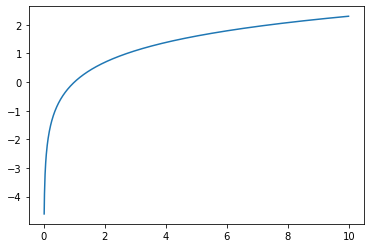

In [2]:
# Logarithm
x = np.arange(0, 10, 0.01)[1:]
y = np.log(x)

plt.plot(x, y)
plt.show()

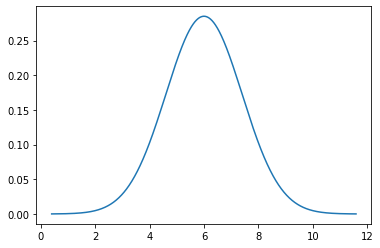

In [3]:
# Normal Distribution
mu = 6
sigma = 1.4
x = np.arange(mu - 4 * sigma, mu + 4 * sigma, 0.01)
y = np.e ** (-0.5 * ((x - mu) / sigma) ** 2) / (sigma * (2 * np.pi) ** 0.5)

plt.plot(x, y)
plt.show()

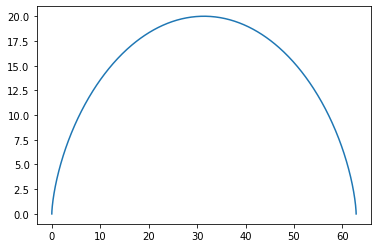

In [4]:
# Cycloid
alpha = 10
theta = np.arange(0, 2 * np.pi, 0.01)
x = alpha * (theta - np.sin(theta))
y = alpha * (1 - np.cos(theta))

plt.plot(x, y)
plt.show()

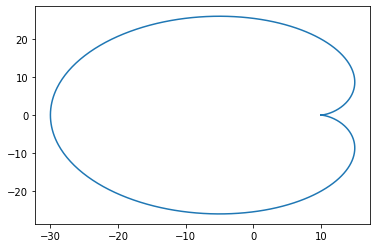

In [5]:
# Heart
alpha = 10
theta = np.arange(0, 2 * np.pi, 0.01)
x = 2 * alpha * (np.cos(theta) - np.cos(2 * theta) / 2)
y = 2 * alpha * (np.sin(theta) - np.sin(2 * theta) / 2)

plt.plot(x, y)
plt.show()

### <span style="color:red">Question2</span> Linear Regression  <span style="color:DarkRed"></span>
Following the steps below to complete the linear regression.  
* Add random noise in points set $x$
* Create your $MSE$ function and partial derivative wrapper.  
* Use **GRADIENT DENCENT** to get your target line's $m$ and $b$, ($y=mx+b$)
* Plot result with matplotlib.


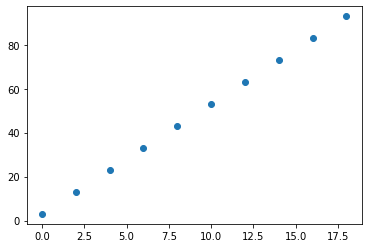

In [6]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 20, 2, dtype='float64')
y = 5*x + 3

# Show the distribution of data
plt.scatter(x, y)
plt.show()

In [7]:
# Step 1
import random

# TODO
# ====
y += np.array([random.gauss(0, 15) for i in range(x.shape[0])])

In [8]:
# Step 2
def mse(x, y, m, b):
    # TODO
    # ====
    return np.sum((y - m * x + b) ** 2 / x.shape[0])

import copy

def partial_derivative(func, terms):
    """An improved version of derivative high order function"""
    
    def wrapper(**kwargs):
        delta = 10e-6
        k_rt = kwargs
        k_lt = kwargs.copy()
        
        gradient = {}
        for term in terms:
            k_rt[term] += delta / 2
            k_lt[term] -= delta / 2
            gradient[term] = (func(**k_rt) - func(**k_lt)) / delta
            k_rt[term] -= delta / 2
            k_lt[term] += delta / 2
        
        return gradient
    
    return wrapper

In [9]:
# Step 3

# DO GRADIENT DENCENT
# TODO
# ====
get_gradient = partial_derivative(mse, ['m', 'b'])

In [10]:
m, b = np.random.random(), np.random.random()
rate = 0.0005

for _ in range(1000):
    gradient = get_gradient(x=x, y=y, m=m, b=b)
    m -= rate * gradient['m']
    b -= rate * gradient['b']

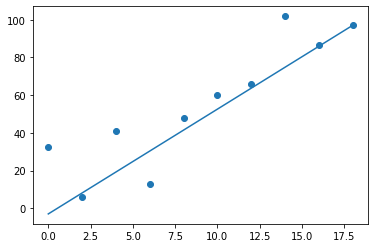

In [11]:
# Step 4

# Draw Result with Matplotlib
# TODO
# ====
reg_line = m * x + b

plt.plot(x, reg_line)
plt.scatter(x, y)
plt.show()